# D&D Dice Math  
## Abstract
In this document we explore probability applied to Dungeons and Dragons with regard to the impacts of choices on a specfic character. We make the decision that while INT increases are valuable, simply forcing disadvantage is worth multiple ASIs in its own right. So the recommendation is to find other impactful uses of the choice of ASI or feat. 

In [0]:
import matplotlib.pyplot as plt
import random as rn
import numpy as np

##Definitions
A roll is using the D20 to generate a random number. Advantage is rolling twice and selecting the higher number while disadvantage is rolling twice and selecting the lower number. In this document we also explore n-advantage, of which only 2-advantage has relevance to the game (elven accuracy). n-advantage is defined so that n dice are rolled and the highest of that set of dice is selected.  




In [0]:
def roll():
  return rn.randint(1,20)

def adv(n=1):
  a = []
  for i in range(n + 1):
    a.append(roll())
  return max(a)

def dis(n=1):
  a = []
  for i in range(n + 1):
    a.append(roll())
  return min(a)
  


This code generates a list of a million rolls to even out disparities. We do the process for standard roll, then for advantage, up to 3-adv, and disadvantage, to 3-dis.

In [0]:
roll_list = []
adv1_list = []
adv2_list = []
adv3_list = []
dis1_list = []
dis2_list = []
dis3_list = []
#For loop to generate our lists
for x in range(0, 1000000):
  roll_list.append(roll())
  adv1_list.append(adv(1))
  adv2_list.append(adv(2))
  adv3_list.append(adv(3))
  dis1_list.append(dis(1))
  dis2_list.append(dis(2))
  dis3_list.append(dis(3))
#numpy unique function lets us convert the lists into lists of (value, frequency)
roll_x, roll_y = np.unique(roll_list, return_counts=True)
adv1_x, adv1_y = np.unique(adv1_list, return_counts=True)
adv2_x, adv2_y = np.unique(adv2_list, return_counts=True)
adv3_x, adv3_y = np.unique(adv3_list, return_counts=True)
dis1_x, dis1_y = np.unique(dis1_list, return_counts=True)
dis2_x, dis2_y = np.unique(dis2_list, return_counts=True)
dis3_x, dis3_y = np.unique(dis3_list, return_counts=True)
#normalize our data
roll_freq = roll_y / np.sum(roll_y)
adv1_freq = adv1_y / np.sum(adv1_y)
adv2_freq = adv2_y / np.sum(adv2_y)
adv3_freq = adv3_y / np.sum(adv3_y)
dis1_freq = dis1_y / np.sum(dis1_y)
dis2_freq = dis2_y / np.sum(dis2_y)
dis3_freq = dis3_y / np.sum(dis3_y)


## Probability of indivdual values
Now to plot our graphs. 

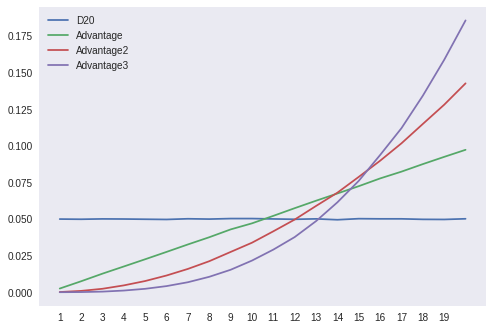

In [4]:
plt.plot(roll_x, roll_freq, label='D20')
plt.plot(adv1_x, adv1_freq, label='Advantage')
plt.plot(adv2_x, adv2_freq, label='Advantage2')
plt.plot(adv3_x, adv3_freq, label='Advantage3')
#plt.plot(dis1_x, dis1_freq, label='Disadvantage')
#plt.plot(dis2_x, dis2_freq, label='Disadvantage2')
#plt.plot(dis3_x, dis3_freq, label='Disadvantage3')
plt.legend()
plt.xticks(np.arange(1, 20, step=1))
plt.grid()
plt.show()

Seperated the graphs to clarify. This is more or less what we expect, as n increases, higher numbers are expected. The opposite is true for disadvantage. 

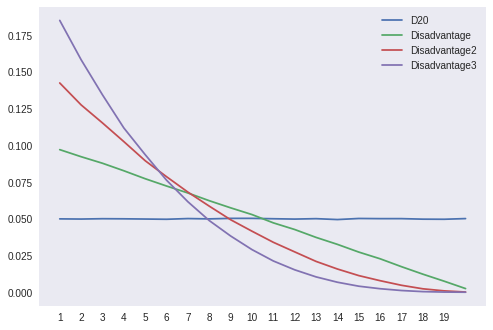

In [5]:
plt.plot(roll_x, roll_freq, label='D20')
plt.plot(dis1_x, dis1_freq, label='Disadvantage')
plt.plot(dis2_x, dis2_freq, label='Disadvantage2')
plt.plot(dis3_x, dis3_freq, label='Disadvantage3')
plt.legend()
plt.xticks(np.arange(1, 20, step=1))
plt.grid()
plt.show()

Does n-advantage produce an n-1 order polynomial graph? Let's find out, but first we'll create a function to determine the likelihood of success given various DCs and advantages, since that was my original goal.

##Beating DCs  
A Difficulty Check (DC) is a number that must be rolled for an actor to succeed or avoid the nasty effects of a condition. In this section we will explore the probilities of passing a DC in several circumstances. For reference, here is our Arcane Trickster's stats:  

|STAT   |  SCORE | MOD|  
|---|---|---|  
|  STR | 10  | +0|  
|  DEX |  20 | +5|  
|  CON |  11 | +0|  
|  WIS |  14 | +2|  
|  INT |  14 |+2|  
|  CHA | 9  |-1|  
With a proficency bonus of +3, so spell save DC of 13

In [0]:
def chanceToBeat(dc, mod=0):
  x = dc - mod - 1
  if x < 0:
    raise Exception("Effective DC is below 1, guaranteed to pass.")
  elif x > 19:
    raise Exception("Effective DC is above 20, guaranteed to fail.")
  data = [roll_freq, adv1_freq, adv2_freq, adv3_freq, dis1_freq, dis2_freq, dis3_freq]
  names = ['D20', 'Advantage', 'Advantage-2', 'Advantage-3', 'Disadvantage', 'Disadvantage-2', 'Disadvantage-3']
  s = "Chance to roll at least " + str(dc) + " with a " + str(mod) + " mod: "
  for i in range(len(data)):
    s = s + "\n \t " + names[i] + ": " + str(np.sum(data[i][x:]) * 100) + " %"
  return s

So the goal here was to determine the effectiveness of a certain build path for my Arcane Trickster. The level 9 feature forces disadvantage on saving throws if the spell is casted from stealth. I wanted to compare this to stacking INT directly which would increase the DC (currently 13) by 1 every 4 levels.   
  
  
The above function will handle something with an effective DC below 0 or above 20 and will throw an error. An effective DC below 0 should have a probability of 1, and above 20, probability of 0.

In [8]:
print(chanceToBeat(13, 0))
print(chanceToBeat(14, 0))
print(chanceToBeat(15, 0))
print(chanceToBeat(20, -2))

Chance to roll at least 13 with a 0 mod: 
 	 D20: 39.981 %
 	 Advantage: 63.990100000000005 %
 	 Advantage-2: 78.3166 %
 	 Advantage-3: 87.0754 %
 	 Disadvantage: 15.9783 %
 	 Disadvantage-2: 6.410399999999999 %
 	 Disadvantage-3: 2.5422000000000002 %
Chance to roll at least 14 with a 0 mod: 
 	 D20: 34.969300000000004 %
 	 Advantage: 57.7385 %
 	 Advantage-2: 72.42259999999999 %
 	 Advantage-3: 82.2177 %
 	 Disadvantage: 12.2424 %
 	 Disadvantage-2: 4.3108 %
 	 Disadvantage-3: 1.4975 %
Chance to roll at least 15 with a 0 mod: 
 	 D20: 30.0184 %
 	 Advantage: 50.99250000000001 %
 	 Advantage-2: 65.62089999999999 %
 	 Advantage-3: 76.0748 %
 	 Disadvantage: 8.9817 %
 	 Disadvantage-2: 2.7292000000000005 %
 	 Disadvantage-3: 0.8166999999999999 %


Exception: ignored

Taking INT for my level 8 ASI nets me 4% more accuracy. While this is nothing to scoff at, we may find other options to be more impactful. At level 10, when the proficency bonus bumps the DC to 14 (15 with the ASI) the difference decreases yet. Let's try another graph. This time, let's graph the probability of getting at least x.  

First we need to convert our list to answer our question. The execise is to find the area under the curve which can be done by summing or integrating.
$$Area = \sum_{min}^{max} P(x) dx$$
To beat a DC, the value can be anywhere from $x = DC$ to $x=20$
$$Area = \sum_{x=DC}^{20} P(x) dx$$

In [0]:
def integrator(x):
  int_x = []
  for i in range(len(x)):
    int_x.append(np.sum(x[i:]))
  return int_x

We sum our lists to find the probabilities of getting at least $x$.

In [0]:
freq_list = [roll_freq, adv1_freq, adv2_freq, adv3_freq, dis1_freq, dis2_freq, dis3_freq]
x_list = [roll_x, adv1_x, adv2_x, adv3_x, dis1_x, dis2_x, dis3_x]
names = ['D20', 'Advantage', 'Advantage-2', 'Advantage-3', 'Disadvantage', 'Disadvantage-2', 'Disadvantage-3']
prob_list = []
for i in freq_list:
  prob_list.append(integrator(i))

Let's set up our graphs. These should look like integrals of the previous graphs. Here we really only care about advantage, disadvantage, and straight rolls:

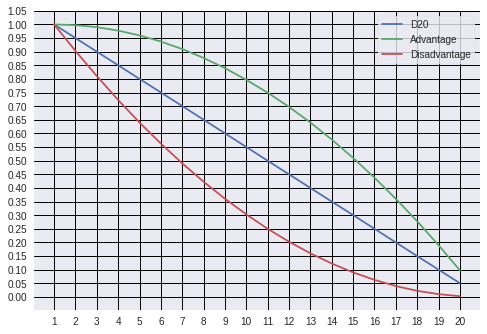

In [11]:
plt.plot(x_list[0], prob_list[0], label=names[0])
plt.plot(x_list[1], prob_list[1], label=names[1])
plt.plot(x_list[4], prob_list[4], label=names[4])
plt.legend(frameon=True)
plt.xticks(np.arange(1, 21, step=1))
plt.yticks(np.arange(0, 1.1, step=.05))
plt.grid(True, color='k')
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

Since we can force disadvantage, we focus on the red line. So cool fact is that my DC 13 with disadvantage is roughly equivalent to DC 18. This tells me maybe I don't need to worry about stacking INT and maybe look at other options. I'm not handling modifiers, but positive modifiers make achieving a DC easier and serve to shift the graph left, opposite for negative modifiers.

# A Diversion  
I'm still curious to see if n-advantage leads to an n-order polynomial. We're going to use the curvefit function from the numpy library to determine if this is true.

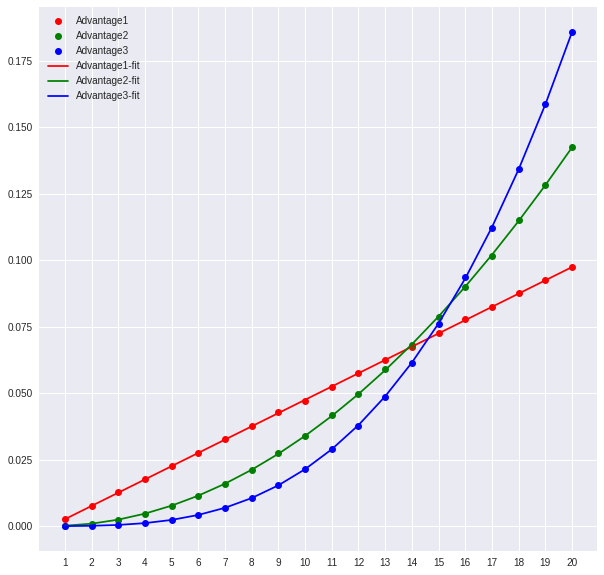

In [12]:
data = np.array([np.array(roll_freq), np.array(adv1_freq), np.array(adv2_freq), np.array(adv3_freq), np.array(dis1_freq), np.array(dis2_freq), np.array(dis3_freq)])
coeffs_adv1 = np.polynomial.polynomial.Polynomial.fit(x_list[0], data[1], 1)
coeffs_adv2 = np.polynomial.polynomial.Polynomial.fit(x_list[0], data[2], 2)
coeffs_adv3 = np.polynomial.polynomial.Polynomial.fit(x_list[0], data[3], 3)

plt.plot(x_list[0], adv1_freq, 'ro', label='Advantage1')
plt.plot(x_list[0], adv2_freq, 'go', label='Advantage2')
plt.plot(x_list[0], adv3_freq, 'bo', label='Advantage3')

plt.plot(x_list[0], coeffs_adv1(x_list[0]), 'r', label='Advantage1-fit')
plt.plot(x_list[0], coeffs_adv2(x_list[0]), 'g', label='Advantage2-fit')
plt.plot(x_list[0], coeffs_adv3(x_list[0]), 'b', label='Advantage3-fit')
plt.xticks(np.arange(1, 21, step=1))
plt.legend()
plt.show()


In [13]:
print(coeffs_adv1)
print(coeffs_adv2)
print(coeffs_adv3)


poly([0.05      0.0474303])
poly([0.03757993 0.0711527  0.03371161])
poly([0.0249595  0.07116642 0.06796708 0.02176267])


Ordinarily, we'd check the residuals but we can see this is a fairly precise fit. Dots are the data and lines are the fits. This tells me there's something analytical here. So let's give it a shot.  
  
  
We are using a D20, so the values 1, 2, ..., 19, 20 are possible in a given roll, and each number has equal probability in a fair roll. 


In [0]:
def gridProb(n):
  a = range(1, n + 1)
  s = '\t'
  for z in a:
    s = s + str(z) + '\t'
  
  for y in a:
    s = s + '\n' + str(y)
    for x in a:
      higher = max([x, y])
      s = s + '\t' + str(higher)
  return s

This function will generate a table of possible values for an advantage scenario. Every value in this table has the same probability of occuring. 

In [15]:
print(gridProb(20))

	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	
1	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20
2	2	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20
3	3	3	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20
4	4	4	4	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20
5	5	5	5	5	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20
6	6	6	6	6	6	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20
7	7	7	7	7	7	7	7	8	9	10	11	12	13	14	15	16	17	18	19	20
8	8	8	8	8	8	8	8	8	9	10	11	12	13	14	15	16	17	18	19	20
9	9	9	9	9	9	9	9	9	9	10	11	12	13	14	15	16	17	18	19	20
10	10	10	10	10	10	10	10	10	10	10	11	12	13	14	15	16	17	18	19	20
11	11	11	11	11	11	11	11	11	11	11	11	12	13	14	15	16	17	18	19	20
12	12	12	12	12	12	12	12	12	12	12	12	12	13	14	15	16	17	18	19	20
13	13	13	13	13	13	13	13	13	13	13	13	13	13	14	15	16	17	18	19	20
14	14	14	14	14	14	14	14	14	14	14	14	14	14	14	15	16	17	18	19	20
15	15	15	15	15	15	15	15	15	15	15	15	15	15	15	15	16	17	18	19	20
16	16	16	16	16	16	16	16	16	16	16	16	16	16	16	16	16	17	18	19	20
17	17	17	17	17	17	17	17	17	17

Let's look at a few values.  

|  Values | Num Possibilities  |  
|---|---|  
| 1  | 1  |  
|  3 | 5  |  
| 5  | 9  |  
| 10  |  19 |  
| 15  | 29  |   
| 20  | 39  |  

So for a given value $x$, there are $2x-1$ possibilities. So we can calculate some statistical values:  
Probability:
$$P(x) = \frac{2x-1}{400}$$
Expected Value:  
$$E(x) = \sum_{x=1}^{20} \frac{2x - 1}{400} x$$

In [16]:

#Expected value:
ev = 0
for ix in range(1, 21):
  ev = ev + (ix * (((2 * ix) - 1) / 400))
print(str(ev))

13.825


In [17]:
print(str(((2 * 20.0) - 1) / 400.0))

0.0975


Analytically we found 9.75% compared to "experiemental" value of 9.71%. We'll say that's good enough. Now let's verify our coefficents:  
$$P_{min\ of} (x) = \sum_{n=x}^{20} P(n)$$  
Changing the bounds:
$$P_{min\ of} (x) = \sum_{n=1}^{20} P(n) - \sum_{n=1}^{x} P(n)$$  
Sum of all probabilities is 1:
$$P_{min\ of} (x) = 1 - \sum_{n=1}^{x} P(n)$$  
Approximating as a continuous function:  
$$P_{min}(x) = 1 - \int_{1}^{x}\frac{2n-1}{400} dn$$
$$P_{min}(x) = 1 - \frac{x^2 - x}{400}$$

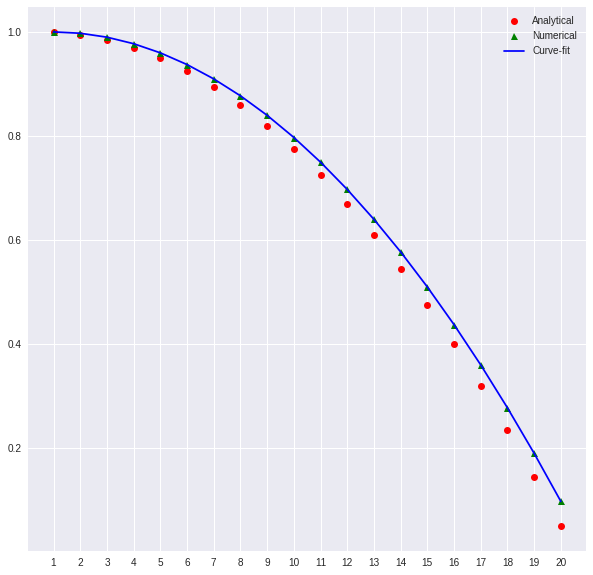

In [18]:
def fxn(x):
  return 1 - ((x ** 2 - x) / 400)

xa = np.linspace(1, 20, 20)
ya = fxn(xa)
plt.plot(xa, ya, 'ro', label='Analytical')
plt.plot(x_list[1], prob_list[1], 'g^', label='Numerical')
coeffs_adv0 = np.polynomial.polynomial.Polynomial.fit(x_list[0], prob_list[1], 2)
plt.plot(x_list[0], coeffs_adv0(x_list[0]), 'b', label='Curve-fit')
plt.xticks(np.arange(1, 21, step=1))
plt.legend()
plt.show()


We did pretty well! The analytic solution diverges a little bit as n -> 20. This could be because of our continuous approximation.

In [19]:
print(coeffs_adv0)
theory = [1, -1/400, -1/400]
print(theory)

poly([ 0.77399497 -0.45126294 -0.22525565])
[1, -0.0025, -0.0025]


Coefficients are a bit odd, but this could also be a result of our approximation.

## Generalization  
Let's see how far this goes.  
For 2-Advantage, 3 dice are rolled and the highest is chosen. If we were to generate a table like we did last time, it'd have to be 3D.   
Compared to 1-Advantage:
$$N_1(x) = 2x - 1$$
Using the same logic, we find the combinations yielding $x$ as:
$$N_2(x) = 3x^2 - 3x+ 1$$  
While we're at it, here's 3-Advantage:
$$N_3(x) = 4x^3 - 6x^2 + 4x -1 $$  
4-Advantage, this time without simplification:
$$N_4(x) = x^4 + (x-1)(x^3 + (x-1)(x^2 + (x-1)x + (x-1)^2))$$
This looks familiar, let's write a recursive expression based on the advantage rank, $d$, using induction:
$$N_d(x) = x^d + (x-1)N_{d-1}(x)$$
The probability is then: 
$$P_d(x) = \frac{N_d(x)}{20^{d+1}}$$ 
This seems reasonable and confirms what we thought: the order of the probability curve is equal to the rank of advantage. It's also worth noting that we should be generating a modified pascals triangle, removing the ones:  
2  
3 3   
4 6 4   
5 10 10 5  

In [0]:
def num_possibilities(x, d):
  if d == 1:
    return (2 * x) - 1
  else:
    return (x ** d) + ((x-1) * num_possibilities(x, d-1))

I want to be able to quickly check for a number of values of d, so we're going to write a function to do everything, including graphing. We're just repeating a lot of our steps from earlier. We also introduce the possibility of subplots to make prettier graphs.

In [0]:
def analytic_check(d, num_iter=100000, subplot=None):
  
  #Calculate analytic curve
  
  xa = np.array(range(1, 21), dtype=np.int16)
  #print(xa)
  ya = np.array([], dtype=np.int16)
  for i in xa:
    ya = np.append(ya, num_possibilities(i, d))
  #print(ya)
  
  #Calculate numerical curve using num_iter number of iterations, then 
  #converting to probability
  
  ya_prob = ya / (20 ** (d+1))
  yd = np.array([], dtype=np.int16)
  for i in range(num_iter):
    yd = np.append(yd, [adv(d)])
  vals, yd_counts = np.unique(yd, return_counts=True)
  yd_prob = yd_counts / np.sum(yd_counts)
  
  #Find the coefficents of numerical data
  
  coeffs_yf = np.polynomial.polynomial.Polynomial.fit(vals, yd_prob, d)

  if subplot:
    plt.subplot(subplot)
  plt.plot(xa, ya_prob, 'ro', label='Analytical')
  plt.plot(vals, yd_prob, 'g^', label='Numerical')
  plt.plot(vals, coeffs_yf(vals), 'b', label='Poly fit')
  plt.title(str(d) + "-Advantage")
  plt.xticks(np.arange(1, 21, step=1))
  plt.xlabel("roll")
  plt.ylabel("probability")
  plt.legend()
  
  
  

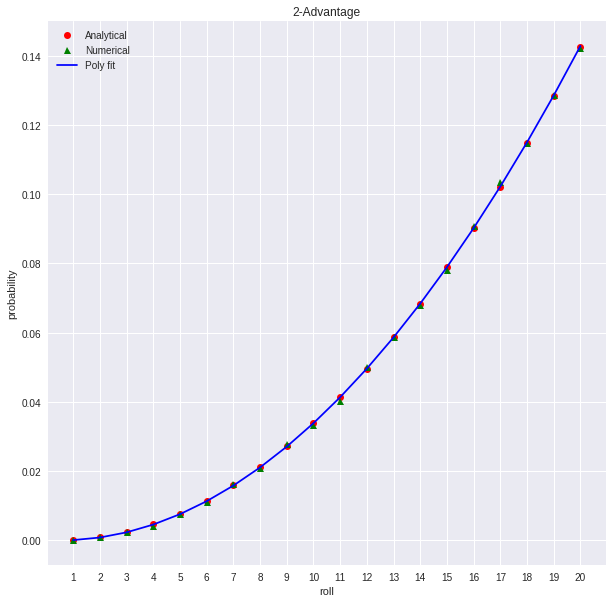

In [22]:
analytic_check(2)
plt.show()

Nice!

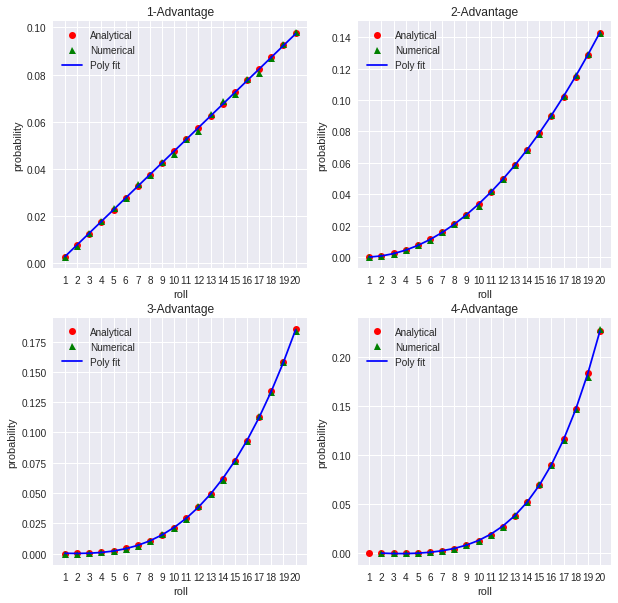

In [23]:
plots = [221, 222, 223, 224]
for i in range(1, 5):
  analytic_check(i, subplot=plots[i-1])
plt.show()

The 4-advantage graph has some domain issues because it did not roll a 1 or 2 in 100k tries. 

## Conclusion  
This document is basically a physics student discovering probability. We used a pseudo-random number generator to simulate dice rolls to gain a better understanding of probability as it applies to D&D. We used graphical analysis to determine the effectiveness of choosing an INT ASI and found diminishing returns and therefore recommend exploring other options for the character's (optimal) progression. We then took a diversion to analyze the effects of advantage on the overall probability for a D20 and found a (recursive) general formula for n-advantage and verified the analytic solution with numerical data. Continuation of this project might include the analytical consideration for disadvantage or repeating the exercise for different die sizes (though the latter point could be solved by simply modifying the roll() function). 